<a href="https://colab.research.google.com/github/minjcop/machinelearning/blob/master/KerasExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서 플로우 초보자 Tutorial
(https://www.tensorflow.org/tutorials/)


## 연동(Google Drive 및 Github)

In [2]:
# 구글 드라이브와 Colab 연동
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# 특정 repository를 Colab에 연동
!git clone https://github.com/minjcop/machinelearning.git

fatal: destination path 'machinelearning' already exists and is not an empty directory.


In [4]:
ls -ltr

total 4828
drwxr-xr-x 1 root root    4096 Jul 10 16:29 sample_data/
-rw-r--r-- 1 root root    2657 Jul 21 05:32 adc.json
drwx------ 4 root root    4096 Jul 21 05:33 gdrive/
drwxr-xr-x 6 root root    4096 Jul 21 05:34 machinelearning/
drwxr-xr-x 2 root root    4096 Jul 21 07:56 training_1/
drwxr-xr-x 2 root root    4096 Jul 21 08:00 training_2/
drwxr-xr-x 2 root root    4096 Jul 21 08:10 checkpoints/
-rw-r--r-- 1 root root 4911264 Jul 21 08:12 my_model.h5


## 기초적인 분류문제

### Keras 사용( Keras : Tensorflow model을 만들고 훈련할 수 있는 고수준 APl )
tf.keras


In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


#### 패션 MNIST dataset 을 사용한다.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape # 훈련세트 60000개의 레이블, 28*28 픽셀

(60000, 28, 28)

#### 데이터 탐색

In [9]:
len(train_labels) # 총 60000개의 이미지

60000

In [10]:
train_labels # 각 레이블은 0 ~ 9의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape # 테스트세트 10000개의 이미지에 대한 레이블, 28*28 픽셀

(10000, 28, 28)

In [12]:
len(test_labels)

10000

#### 데이터 전처리

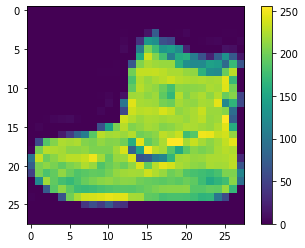

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0 # 픽셀 범위 0 ~ 255

test_images = test_images / 255.0

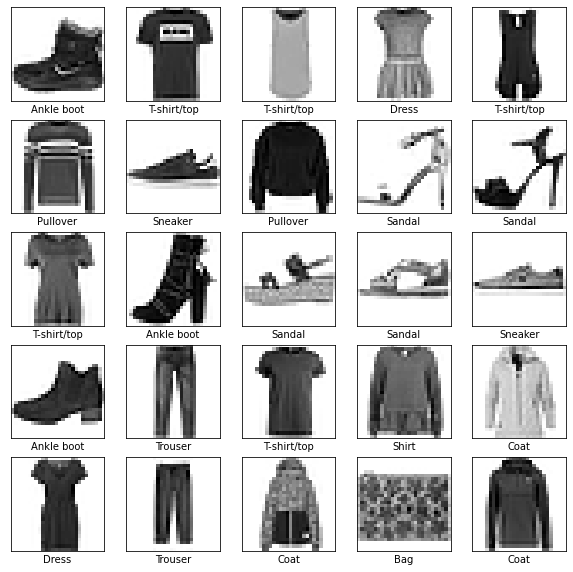

In [15]:
# training set 에서 처음 25개의 이미지와 클래스 이름을 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 층 설정

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### 모델 컴파일

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 모델 훈련

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4951 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3725 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8921


#### 정확도 평가

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 : ', test_acc)

313/313 - 0s - loss: 0.3479 - accuracy: 0.8730

테스트 정확도 :  0.8730000257492065


#### 예측 만들기

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0] # 첫번째 예측

array([2.0719410e-05, 2.1220731e-07, 3.7645671e-07, 3.0625890e-07,
       5.5280669e-08, 2.0309189e-02, 3.5735547e-06, 2.0636870e-02,
       1.9784302e-06, 9.5902675e-01], dtype=float32)

In [22]:
np.argmax(predictions[0]) # 신뢰도가 가장 높은 것

9

In [23]:
test_labels[0] # 위에서는 class_name[9]라고 예측하고 있는데 이것이 맞는지를 확인

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#221111")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')

  thisplot[true_label].set_color('blue')

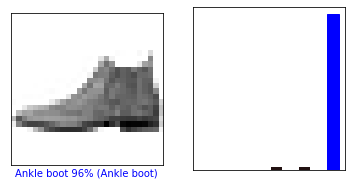

In [25]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

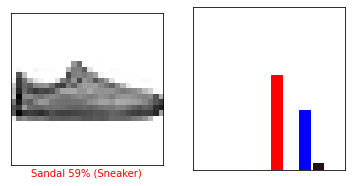

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [27]:
# 올바르게 예측된 경우 파랑색, 잘못 예측된 경우 빨강색으로 나타난다.

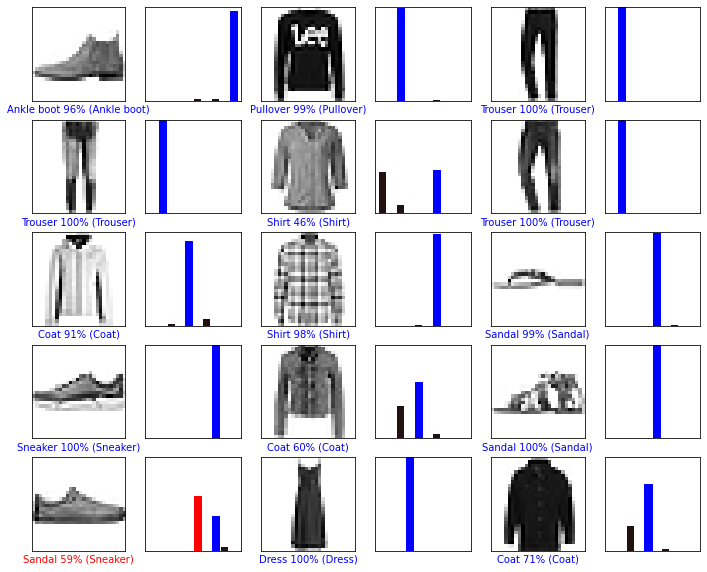

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [29]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [30]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.0719430e-05 2.1220751e-07 3.7645742e-07 3.0625975e-07 5.5280768e-08
  2.0309210e-02 3.5735513e-06 2.0636892e-02 1.9784320e-06 9.5902675e-01]]


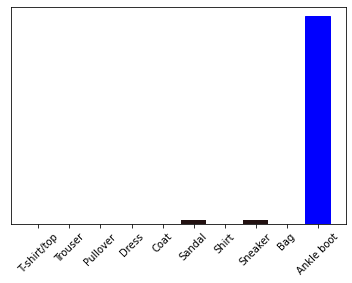

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

9

## 영화 리뷰를 사용한 텍스트 분류

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview
2.2.0


### IMDB 데이터셋 다운로드

In [35]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### 데이터 탐색

In [36]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [37]:
print(train_data[0]) # 특정 단어를 나타내는 정수로 변환되어 있다.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [38]:
len(train_data[0]), len(train_data[1]) # 단어의 개수

(218, 189)

#### 정수를 단어로 다시 변환

In [39]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [40]:
decode_review(train_data[0]) # 첫번째 리뷰 텍스트 출력

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### 데이터 준비

In [41]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [42]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [43]:
# 패딩된 첫 번째 리뷰 내용 확인
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### 모델 구성
* 모델에서 얼마나 많은 층을 사용할 것인가?
* 각 층에서 얼마나 많은 은닉 유닛(Hidden unit)을 사용할 것인가?

In [44]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


1. 첫 번째 층은 Embedding 층입니다. 이 층은 정수로 인코딩된 단어를 입력 받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾습니다. 이 벡터는 모델이 훈련되면서 학습됩니다. 이 벡터는 출력 배열에 새로운 차원으로 추가됩니다. 최종 차원은 (batch, sequence, embedding)이 됩니다.
2. 그다음 GlobalAveragePooling1D 층은 sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환합니다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법입니다.
3. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Dense)을 거칩니다.
4. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층입니다. sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력합니다. 이 값은 확률 또는 신뢰도를 나타냅니다.

 은닉 유닛(Hidden Unit)
* 위 모델에는 입력과 출력 사이에 두 개의 중간 또는 '은닉' 층이 있다. 출력의 개수는 층이 가진 표현공간(representational space)의 차원이 된다. 다른 말로 하면, 내부 표현을 학습할 때 허용되는 네트워크 자유도의 양이다.

* 모델에 많은 은닉 유닛(고차원의 표현 공간)과 층이 있다면 네트워크는 더 복잡한 표현을 학습할 수 있다. 하지만 네트워크의 계산 비용이 많이 들고 원치 않는 패턴을 학습할 수도 있다. 이런 표현은 훈련 데이터의 성능을 향상시키지만 테스트 데이터에서는 그렇지 않다. 이를 과적합(Overfitting)이라고 한다. 




손실 함수와 옵티마이저

- 모델이 훈련하려면 손실 함수(loss function)과 옵티마이저(optimizer)가 필요하다.

In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 검증 세트 만들기

In [46]:
# 원본 데이터에서 10000개를 가져와서 검증 세트를 만든다.
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### 모델 훈련

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6924 - accuracy: 0.5035 - val_loss: 0.6910 - val_accuracy: 0.5080
Epoch 2/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6880 - accuracy: 0.6878 - val_loss: 0.6847 - val_accuracy: 0.7119
Epoch 3/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6780 - accuracy: 0.7447 - val_loss: 0.6719 - val_accuracy: 0.7331
Epoch 4/40
30/30 [==============================] - 1s 19ms/step - loss: 0.6593 - accuracy: 0.7513 - val_loss: 0.6499 - val_accuracy: 0.7605
Epoch 5/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6303 - accuracy: 0.7819 - val_loss: 0.6194 - val_accuracy: 0.7732
Epoch 6/40
30/30 [==============================] - 1s 20ms/step - loss: 0.5929 - accuracy: 0.8017 - val_loss: 0.5824 - val_accuracy: 0.7956
Epoch 7/40
30/30 [==============================] - 1s 21ms/step - loss: 0.5500 - accuracy: 0.8176 - val_loss: 0.5421 - val_accuracy: 0.8112
Epoch 8/40
30

### 모델 평가

In [48]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3191 - accuracy: 0.8736
[0.3190530836582184, 0.8736400008201599]


### 정확도와 손실 그래프 그리기

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

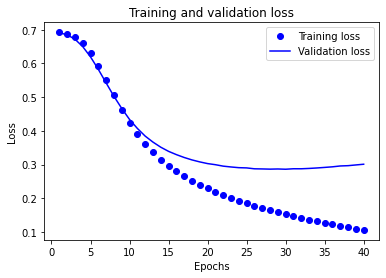

In [50]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

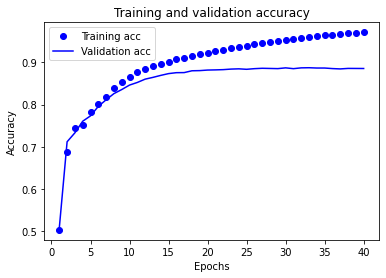

In [51]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 회귀(regression)은 가격이나 확률과 같이 연속된 출력 값을 예측하는 것이 목적
- 분류(classification)은 여러 개의 클래스 중 하나의 클래스를 선택하는 것이 목적

 과대적합과 과소적합
- 과대적합(Overfitting) : 훈련 세트에서는 높은 성능을 얻을 수 있지만, 테스트 세트(혹은 이전에 본 적 없는 데이터)에 잘 일반화가 되어야 한다.)
- 과소적합(Underfitting) : 테스트 세트의 성능이 향상될 여지가 아직 있을 때 발생. (Ex) 모델이 너무 단순, 규제가 많음, 충분히 오래 훈련하지 않는 경우)

## 모델 저장과 복원

### 설정

In [52]:
!pip install -q h5py pyyaml

### 예제 데이터 셋 받기

In [53]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.2.0'

In [54]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

### 모델 정의

In [55]:
# 간단한 Sequential 모델을 반환합니다
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model


# 모델 객체를 만듭니다
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 훈련하는 동안 체크포인트 저장
- 체크포인트 콜백 사용

In [56]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  # 훈련 단계에 콜백을 전달합니다

# 옵티마이저의 상태를 저장하는 것과 관련되어 경고가 발생할 수 있습니다.
# 이 경고는 (그리고 이 노트북의 다른 비슷한 경고는) 이전 사용 방식을 권장하지 않기 위함이며 무시해도 좋습니다.

Epoch 1/10
25/32 [======================>.......] - ETA: 0s - loss: 1.2869 - accuracy: 0.6313
Epoch 00001: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 11ms/step - loss: 1.1603 - accuracy: 0.6660 - val_loss: 0.6925 - val_accuracy: 0.7830
Epoch 2/10
26/32 [=======================>......] - ETA: 0s - loss: 0.4226 - accuracy: 0.8870
Epoch 00002: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 8ms/step - loss: 0.4194 - accuracy: 0.8910 - val_loss: 0.5349 - val_accuracy: 0.8280
Epoch 3/10
25/32 [======================>.......] - ETA: 0s - loss: 0.3019 - accuracy: 0.9150
Epoch 00003: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 8ms/step - loss: 0.2830 - accuracy: 0.9210 - val_loss: 0.4510 - val_accuracy: 0.8590
Epoch 4/10
27/32 [========================>.....] - ETA: 0s - loss: 0.2053 - accuracy: 0.9479
Epoch 00004: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 

In [57]:
# 이 코드는 텐서플로 체크포인트 파일을 만들고 에포크가 종료될 때마다 업데이트합니다:
!ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [58]:
# 훈련되지 않은 모델 (무작위나 다름없음)
model = create_model()

loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 2.3287 - accuracy: 0.1330
훈련되지 않은 모델의 정확도: 13.30%


In [59]:
# 체크포인트에서 가중치를 복원하고 다시 평가한 모델
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4065 - accuracy: 0.8710
복원된 모델의 정확도: 87.10%


#### 체크포인트 콜백 매개변수
- 몇가지 매개변수를 제공함, 체크포인트 이름을 고유하게 만들거나, 체크포인트 주기를 조정할 수 있다.

In [60]:
# 새로운 모델을 훈련, 5번의 epoch마다 고유한 이름으로 체크포인트를 저장
# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # 다섯 번째 에포크마다 가중치를 저장합니다
    period=5)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [61]:
# 만들어진 체크포인트 확인, 마지막 체크포인트 선택
! ls {checkpoint_dir}

checkpoint			  cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001  cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index		  cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001  cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index		  cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001  cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index		  cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001  cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index		  cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001  cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index		  cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [62]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

텐서플로우는 기본적으로 최근 5개의 체크포인트만 저장한다. 

In [63]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels, verbose = 2)
print('복원된 모델의 정확도 : {:5.2f}%'.format(100*acc))

32/32 - 0s - loss: 0.4921 - accuracy: 0.8770
복원된 모델의 정확도 : 87.70%


### 체크포인트 파일
위 코드는 일련의 체크포인트 포맷의 파일에 저장한다. 이 파일이 포함하는 것은 훈련된 이진 format의 가중치이다. 체크포인트가 담고 있는 것은
- 모델의 가중치를 포함하는 하나 이상의 샤드
- 가중치가 어느 샤드에 저장되어 있는지를 나타내는 인덱스 파일

** 샤드 : 대량의 데이터를 처리하기 위해서 파티셔닝 된 개별의 것들

### 수동으로 가중치 저장하기
- Model.save_weights 를 사용한다.

In [64]:
# 가중치를 저장합니다
model.save_weights('./checkpoints/my_checkpoint')

# 가중치를 복원합니다
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4921 - accuracy: 0.8770
복원된 모델의 정확도: 87.70%


### 모델 전체를 저장하기
- 전체 모델을 파일 하나에 저장할 수 있다. 여기에는 가중치, 모델 구성, 심지어 옵티마이저에 지정한 설정까지
포함된다. 모델의 체크포인트를 저장하므로 원본 코드를 사용하지 않고 나중에 정확히 동일한 상태에서 훈련을 다시 시작할 수 있다

#### HDF5 파일로 저장하기

In [65]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

# 전체 모델을 HDF5 파일로 저장합니다
model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 1.1595 - accuracy: 0.6800
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8770
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2808 - accuracy: 0.9300
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1966 - accuracy: 0.9530
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1520 - accuracy: 0.9680


In [66]:
# 이 파일로부터 다시 모델 만들기
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [67]:
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4279 - accuracy: 0.8650
복원된 모델의 정확도: 86.50%


- 가중치 값
- 모델 설정(구조)
- 옵티마이저 설정